In [1]:
options(
    repr.plot.width = 8, 
    repr.plot.height = 5,
    # silence tidyverse messages
    tidyverse.quiet = TRUE,
    dplyr.summarise.inform = FALSE,
    dplyr.ungroup.inform = FALSE,
    readr.show_progress = FALSE,
    readr.show_col_types = FALSE
)

library(tidyverse)
library(latex2exp)
library(patchwork)
library(here)
library(tikzDevice)
library(ggsci)


theme_set(theme_minimal())
df_mse <- read_csv(here("data/figures/03_state_space_models/compare_ce_eis_mse.csv"))
df_ef <- read_csv(here("data/figures/03_state_space_models/ef_large_N.csv"))
df_dimensions <- read_csv(here("data/figures/03_state_space_models/ef_dimensions.csv"))

here() starts at /home/sheyder/workspace/work/phd/thesis



In [2]:
theme_thesis <- function() {
    theme_minimal()
}

theme_set(theme_thesis())
options(
    ggplot2.discrete.colour = scale_color_npg
)

In [3]:
default_width <- 8
default_height <- 5
ggsave_tikz <- function(filename, plot=last_plot(), width=default_width, height=default_height, ...) {
    tikz(filename, width=width,height=height, ...)
    print(plot)
    dev.off()
}

png 
  2

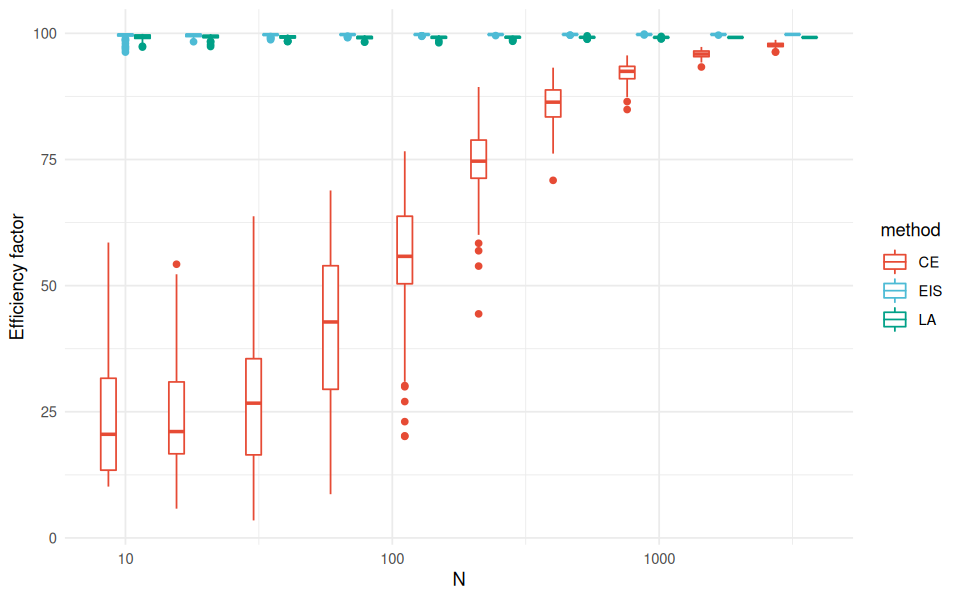

In [4]:
df_mse %>%
    ggplot(aes(N, ef, group = interaction(N, method))) +
    geom_boxplot(aes(color = method)) +
    scale_x_log10() +
    labs(x="N", y="Efficiency factor")

ggsave_tikz(here("tikz/ef_comparison_medium_N.tex"))

png 
  2

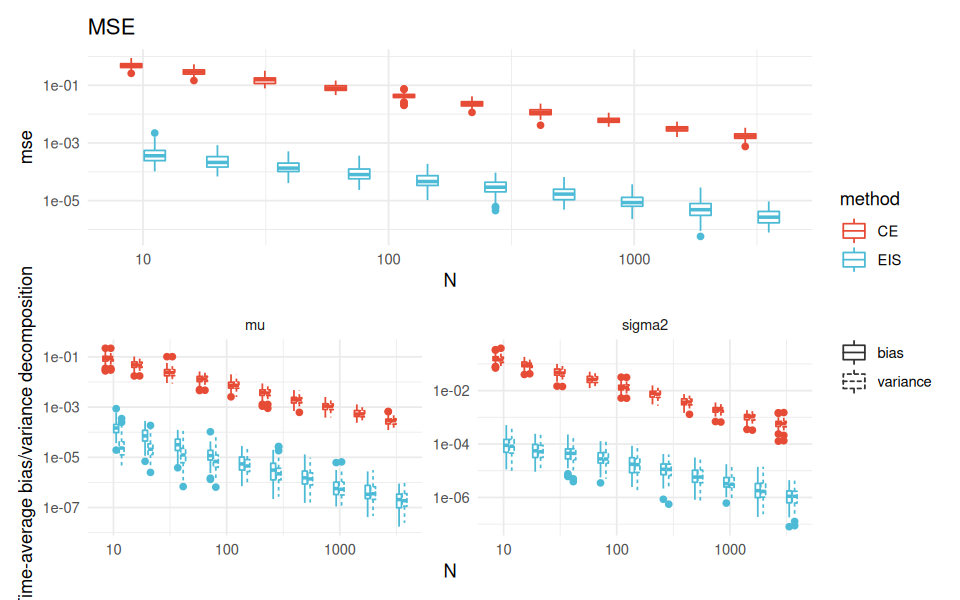

In [5]:
mse_plot <- df_mse %>%
    filter(method != "LA") %>%
    mutate(mse = mean_bias + mean_var + var_bias + var_var) %>%
    select(method, N, mse) %>%
    ggplot(aes(N, mse, group = interaction(N, method))) +
    geom_boxplot(aes(color = method)) +
    scale_x_log10() +
    scale_y_log10() +
    labs(x="N", title="MSE")


bias_var_plot <- df_mse %>%
    filter(method != "LA") %>%
    select(method, N, mean_bias:var_var) %>%
    pivot_longer(-c(method, N)) %>%
    mutate(parameter = ifelse(str_starts(name, "mean"), "mu", "sigma2")) %>% #TeX("$\\mu$"), TeX("$\\sigma^2$"))) %>%
    mutate(type=ifelse(str_ends(name, "bias"), "bias", "variance")) %>%
    mutate(combination = paste0(method, " - ", type)) %>%
    ggplot(aes(N, value)) +
    geom_boxplot(aes(color=method, group=interaction(N, combination), linetype = type)) +
    #geom_smooth(aes(color=method), method='lm', se=FALSE, alpha = .1) + 
    scale_y_log10() +
    scale_x_log10() +
    facet_wrap(~parameter, scales = "free_y") +
    scale_linetype(name="") +
    ylab("Time-average bias/variance decomposition")

(mse_plot / bias_var_plot) + plot_layout(guides = "collect")
ggsave_tikz(here("tikz/mse_bias_var_decomposition.tex"))

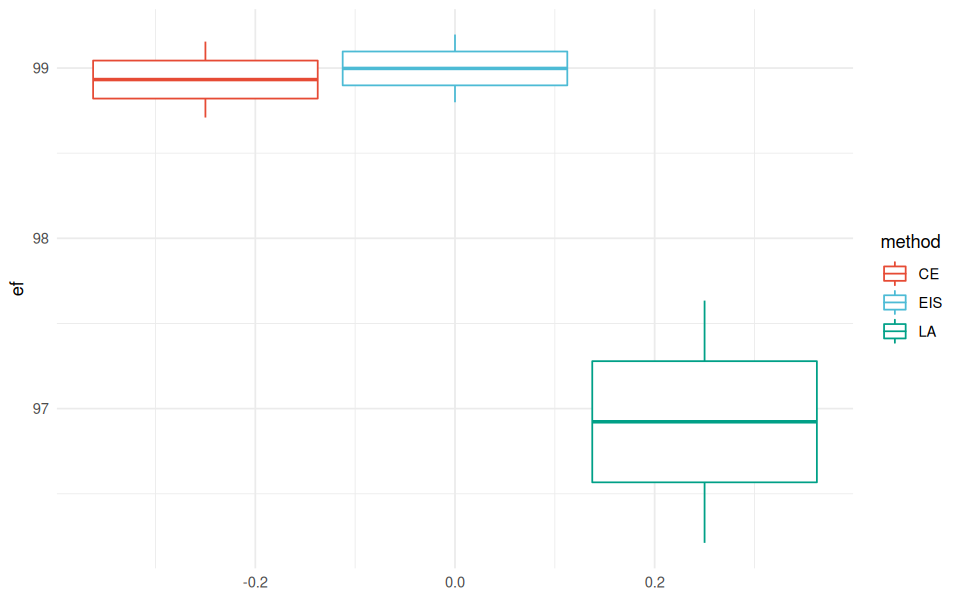

In [6]:
df_ef %>%
    ggplot(aes(y=ef, color=method)) +
    geom_boxplot() 

png 
  2

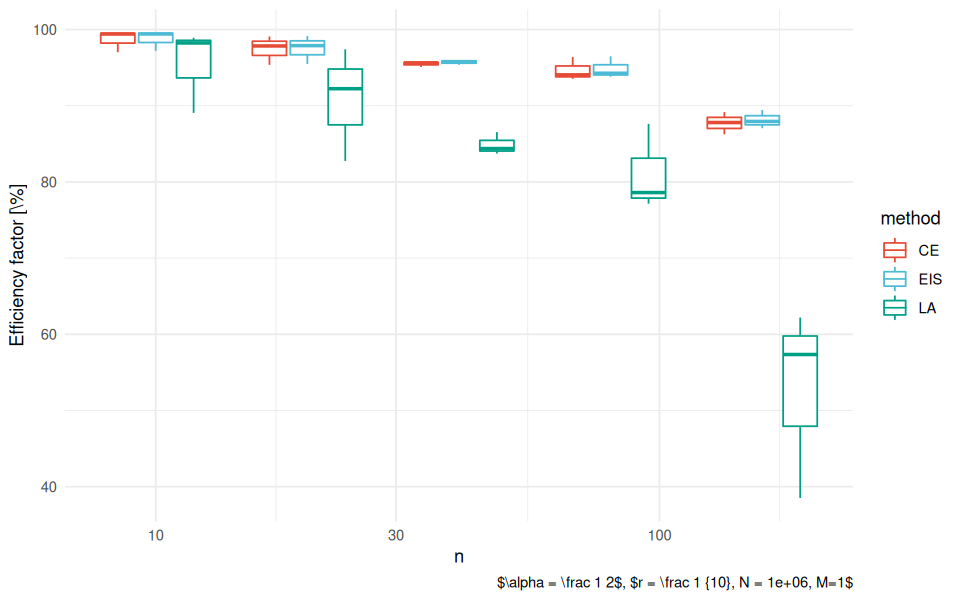

In [7]:
N <- df_dimensions %>%
    pull(N) %>%
    unique
    
M <- df_dimensions %>%
    distinct(m) %>%
    pull(m)

caption <- str_glue("$\\alpha = \\frac 1 2$, $r = \\frac 1 {{10}}, N = {N}, M={M}$")

df_dimensions %>%
    ggplot(aes(x=n, y=ef, color=method)) +
    geom_boxplot(aes(group = interaction(n, method))) +
    scale_x_log10() +
    labs(x="n", y="Efficiency factor [\\%]", caption=caption)

ggsave_tikz(here("tikz/ef_time_dimension.tex"))